# Plot of $P(A|I,H)$ to include in the supplement.

Developed by Siobhan Powell, 2021.

In [1]:
import os
os.chdir('../RunningModel')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from speech_classes import SPEECh
from speech_classes import SPEEChGeneralConfiguration
from speech_classes import LoadProfile
from speech_classes import Plotting
from speech_classes import DataSetConfigurations

In [ ]:
speech = SPEECh(data=data)
speech.pa_ih(scenario='HighHome')

In [5]:
speech.pb_i()
speech.pb_i_data

,I_0,I_1,I_2
largebattery_0,0.6941,0.6675,0.6207
largebattery_1,0.3059,0.3325,0.3793


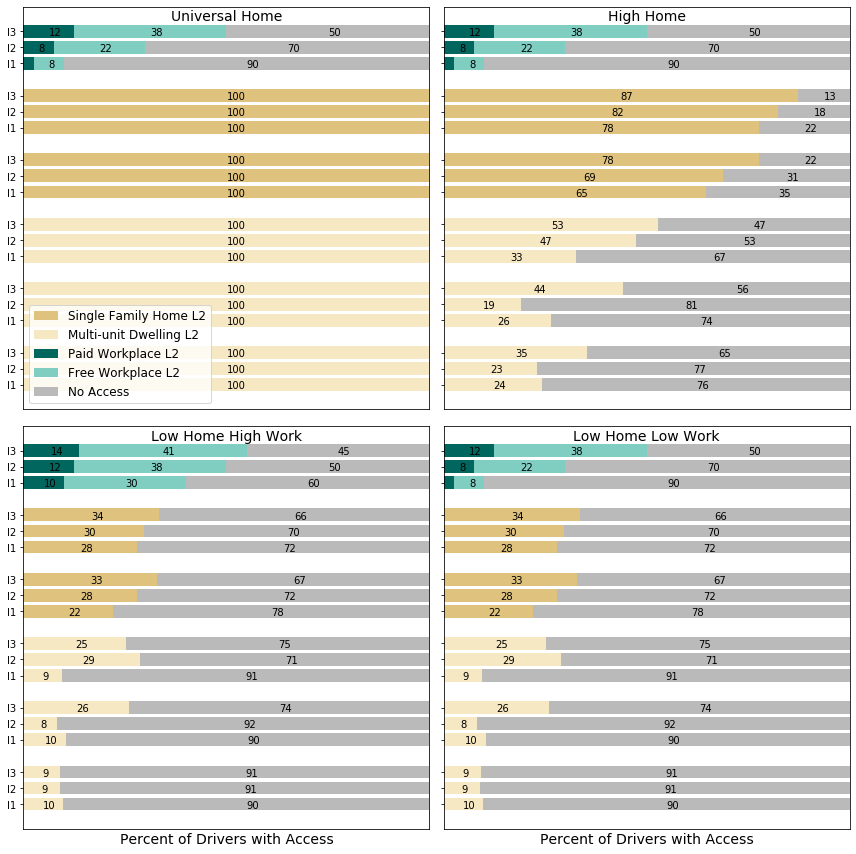

In [6]:
colours1 = [data.colours['Residential L2'], data.colours['MUD L2'], '#bababa']
colours2 = ['#01665e', '#80cdc1', '#bababa']

labs1 = ['Single Family Home L2', 'Multi-unit Dwelling L2', 'No Access']
labs2 = ['Paid Workplace L2', 'Free Workplace L2', 'No Access']

fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)
scenarios = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']
scenario_names = ['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']

for scen_num in range(4):
    
    data = DataSetConfigurations(data_set='CP')
    speech = SPEECh(data)
    speech.pa_ih(scenario=scenarios[scen_num])

    row = int(scen_num/2)
    col = scen_num - 2*row

    mat = speech.pa_home_ih.loc[['home_l2', 'home_mud', 'home_0'], :].T
    for i in range(3):
        for j in range(5):
            inds = np.arange(3*j, 3*(j+1))
            baseind = 4*j
            if (j == 0) and (i < 2):
                axes[row, col].barh(baseind + np.arange(0, 3), mat.loc[mat.index[inds].values, mat.columns[i]], left=mat.loc[mat.index[inds].values, mat.columns[:i]].sum(axis=1), color=colours1[i], label=labs1[i])
            else:
                axes[row, col].barh(baseind + np.arange(0, 3), mat.loc[mat.index[inds].values, mat.columns[i]], left=mat.loc[mat.index[inds].values, mat.columns[:i]].sum(axis=1), color=colours1[i])
            for idk, k in enumerate(inds):
                val = mat.loc[mat.index[k], mat.columns[i]]
                if val > 0.05:
                    y = mat.loc[mat.index[inds].values, mat.columns[:i]].sum(axis=1)[idk] + (val/2)
                    axes[row, col].text(y, baseind + idk - 0.25, str(int(np.round(val*100))))
    axes[row, col].set_xticks([])

    mat2 = speech.pa_work_i.T
    for i in range(3):
    #     if i < 2:
        axes[row, col].barh(20 + np.arange(0, len(mat2)), mat2[mat2.columns[i]], left=mat2[mat2.columns[:i]].sum(axis=1), color=colours2[i], label=labs2[i])
        for k in range(3):
            val = mat2.loc[mat2.index.values[k], mat2.columns[i]]
            if val > 0.05:
                y = mat2[mat2.columns[:i]].sum(axis=1)[k] + (val/2)
                axes[row, col].text(y, 20 + k - 0.25, str(int(np.round(val*100))))

    if col == 0:
        axes[row, col].set_yticks([0,1,2,4,5,6,8,9,10,12,13,14,16,17,18,20,21,22])
        axes[row, col].set_yticklabels(['I1', 'I2', 'I3', 'I1', 'I2', 'I3', 'I1', 'I2', 'I3', 'I1', 'I2', 'I3', 'I1', 'I2', 'I3', 'I1', 'I2', 'I3'])
    axes[row, col].set_xlim([0, 1])
    axes[row, col].set_title(scenario_names[scen_num], y=0.95, fontsize=14)
axes[0, 0].legend(loc='lower left', fontsize=12)
axes[1, 0].set_xlabel('Percent of Drivers with Access', fontsize=14)
axes[1, 1].set_xlabel('Percent of Drivers with Access', fontsize=14)
plt.tight_layout()
plt.savefig('../Plotting/supfig19.pdf', bbox_inches='tight')
plt.show()
